In [1022]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.getcwd() + '/ML')

In [1023]:
df= pd.read_csv(r"./timezone-PA-B.csv", sep=',')
df = df.drop_duplicates(subset=['iid'])
dfg= pd.read_csv(r"./PA-AgeGender-Predicted.csv", sep=',')
dfg = dfg.drop_duplicates(subset=['iid'])
dfg['user.id']=dfg['user.id'].astype("category")
main= pd.read_csv(r"./PA-All.csv", sep=',')
main = main.drop_duplicates('iid', keep='first')
#main['user.id']=main['user.id'].astype('str')

In [1024]:
main.shape

(47079, 31)

In [1025]:
R1= df[['iid', 'A1', 'A2', 'A3', 'truth', 'text', 'hour', 'weekday', 'month']]
R2= main[['iid', 'user.id']]

In [1026]:
M=pd.merge(R2, R1, on='iid', how='inner')

In [1027]:
print(M.shape)
M.head()

(3998, 10)


,iid,user.id,A1,A2,A3,truth,text,hour,weekday,month
0,5ece812df46b2b34fcc352ac,1.280033e+09,0,0,0,0,@murphdog47 Sad to see hockey hat guy go but y...,22,Sat,02
1,5ece812ef46b2b34fcc3a0be,2.660984e+08,0,0,0,0,You’re very welcome! Thank you for bringing ho...,22,Sun,02
2,5ece814af46b2b34fcc9528a,1.255151e+06,0,1,0,0,Random #productivity hacks continued:\n\n🎽 On ...,21,Sat,02
3,5ece815ef46b2b34fccd1ae2,1.038975e+09,0,0,0,0,Now they’ll say a few useless scripted platitu...,22,Sat,02
4,5ece8169f46b2b34fccf47ef,2.293366e+09,0,0,0,0,A simple exercise you must do everyday to keep...,22,Sat,02


In [1028]:
del dfg['iid']
M2=pd.merge(M, dfg, on='user.id', how='inner')

In [1029]:
M2.head()

,iid,user.id,A1,A2,A3,truth,text,hour,weekday,month,...,30-39,<=18,>=40,female,male,is-org,non-org,age,sex,org
0,5ece812df46b2b34fcc352ac,1.28003e+09,0,0,0,0,@murphdog47 Sad to see hockey hat guy go but y...,22,Sat,02,...,0.5846,0.0242,0.2901,0.0182,0.9818,0.8298,0.1702,30-39,male,is-org
1,5ece812ef46b2b34fcc3a0be,2.66098e+08,0,0,0,0,You’re very welcome! Thank you for bringing ho...,22,Sun,02,...,0.2499,0.0388,0.0740,0.0011,0.9989,0.0000,1.0000,19-29,male,non-org
2,5ece814af46b2b34fcc9528a,1.25515e+06,0,1,0,0,Random #productivity hacks continued:\n\n🎽 On ...,21,Sat,02,...,0.9023,0.0002,0.0010,0.9998,0.0002,0.0000,1.0000,30-39,female,non-org
3,5ece815ef46b2b34fccd1ae2,1.03898e+09,0,0,0,0,Now they’ll say a few useless scripted platitu...,22,Sat,02,...,0.0112,0.0073,0.9664,0.0017,0.9983,0.0028,0.9972,>=40,male,non-org
4,5ece8169f46b2b34fccf47ef,2.29337e+09,0,0,0,0,A simple exercise you must do everyday to keep...,22,Sat,02,...,0.0677,0.0077,0.9071,0.1231,0.8769,0.7731,0.2269,>=40,male,is-org


In [1030]:
M2.shape

(3457, 26)

In [1031]:
# M2=M2[['iid','A1', 'A2', 'A3', 'age', 'sex', 'org','hour','weekday','text', 'month']]
M2=M2[['iid','A1', 'A2', 'A3', 'age', 'sex', 'org','hour','weekday', 'month']]

In [1032]:
M2.head()

,iid,A1,A2,A3,age,sex,org,hour,weekday,month
0,5ece812df46b2b34fcc352ac,0,0,0,30-39,male,is-org,22,Sat,02
1,5ece812ef46b2b34fcc3a0be,0,0,0,19-29,male,non-org,22,Sun,02
2,5ece814af46b2b34fcc9528a,0,1,0,30-39,female,non-org,21,Sat,02
3,5ece815ef46b2b34fccd1ae2,0,0,0,>=40,male,non-org,22,Sat,02
4,5ece8169f46b2b34fccf47ef,0,0,0,>=40,male,is-org,22,Sat,02


In [1033]:
M2.to_csv("PA.csv", index=False)

In [1034]:
PAMVB= pd.read_csv('PA-MV-B.csv')
final=pd.merge(M2, PAMVB, on='iid', how='inner')

print(final.shape)
final.head()


(3457, 12)


,iid,A1,A2,A3,age,sex,org,hour,weekday,month,result,truth
0,5ece812df46b2b34fcc352ac,0,0,0,30-39,male,is-org,22,Sat,02,0,0
1,5ece812ef46b2b34fcc3a0be,0,0,0,19-29,male,non-org,22,Sun,02,0,0
2,5ece814af46b2b34fcc9528a,0,1,0,30-39,female,non-org,21,Sat,02,0,0
3,5ece815ef46b2b34fccd1ae2,0,0,0,>=40,male,non-org,22,Sat,02,0,0
4,5ece8169f46b2b34fccf47ef,0,0,0,>=40,male,is-org,22,Sat,02,0,0


In [1035]:
final.to_csv('PA-MV-LSTM.csv')

------------------------------------

### I need to generate a separate CSV file to be able to test the number of FN's between inference methods and ML models.

In [1036]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
from plotly.graph_objs import *

# for configuring connection 
import os

%matplotlib inline


import os


from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

#configure the notebook for use in offline mode
init_notebook_mode(connected=True)

In [1037]:
df=final #we have the MV results too
missing_values_count = df.isnull().sum()
missing_values_count

iid        0
A1         0
A2         0
A3         0
age        0
sex        0
org        0
hour       0
weekday    0
month      0
result     0
truth      0
dtype: int64

In [1038]:
df= df[df['hour']!='dummy']
df['weekday']=df['weekday'].astype("category")
df['hour']=df['hour'].astype("int")
df['month']=df['month'].astype("int")
df['A1']=df['A1'].astype("category")
df['A2']=df['A2'].astype("category")
df['A3']=df['A3'].astype("category")
df['sex']=df['sex'].astype("category")
df['age']=df['age'].astype("category")
df['org']=df['org'].astype("category")
df['truth']=df['truth'].astype("category")
df['result']=df['result'].astype("category")

df.head()

<ipython-input-1038-29ca79868650>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1038-29ca79868650>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1038-29ca79868650>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-1038

,iid,A1,A2,A3,age,sex,org,hour,weekday,month,result,truth
0,5ece812df46b2b34fcc352ac,0,0,0,30-39,male,is-org,22,Sat,2,0,0
1,5ece812ef46b2b34fcc3a0be,0,0,0,19-29,male,non-org,22,Sun,2,0,0
2,5ece814af46b2b34fcc9528a,0,1,0,30-39,female,non-org,21,Sat,2,0,0
3,5ece815ef46b2b34fccd1ae2,0,0,0,>=40,male,non-org,22,Sat,2,0,0
4,5ece8169f46b2b34fccf47ef,0,0,0,>=40,male,is-org,22,Sat,2,0,0


In [1039]:
df= df[df['truth']!=5]
df= df[df['A1']!=5]
df= df[df['A2']!=5]
df= df[df['A3']!=5]


In [1040]:
df['truth'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [1041]:
# df['truth']=np.where(df['truth'] ==1, 'YY', df['truth'])
# df['truth']=np.where(df['truth'] =='2', 'YN', df['truth'])
# df['truth']=np.where(df['truth'] =='3', 'NY', df['truth'])
# df['truth']=np.where(df['truth'] =='4', 'NN', df['truth'])
# #df['truth']=np.where(df['truth'] =='5', 'NC', df['truth'])

In [1042]:
df = pd.get_dummies(df, prefix=['A1', 'A2', 'A3',  'age', 'sex', 'org', 'weekday', 'result'], columns=['A1', 'A2', 'A3', 'age', 'sex', 'org', 'weekday', 'result'], drop_first=True)

df.head()

,iid,hour,month,truth,A1_1,A2_1,A3_1,age_30-39,age_<=18,age_>=40,sex_male,org_non-org,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,result_1
0,5ece812df46b2b34fcc352ac,22,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,5ece812ef46b2b34fcc3a0be,22,2,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,5ece814af46b2b34fcc9528a,21,2,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
3,5ece815ef46b2b34fccd1ae2,22,2,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0
4,5ece8169f46b2b34fccf47ef,22,2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [1043]:
df.columns

Index(['iid', 'hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1', 'age_30-39',
       'age_<=18', 'age_>=40', 'sex_male', 'org_non-org', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'result_1'],
      dtype='object')

In [1044]:
import re
regex = re.compile(r"\[|\]|<|>", re.IGNORECASE)
df=df[['iid','hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1', 'age_30-39',
       'age_<=18', 'age_>=40', 'sex_male', 'org_non-org', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'result_1']]
 
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in df.columns.values]


In [1045]:
df.columns

Index(['iid', 'hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1', 'age_30-39',
       'age__=18', 'age__=40', 'sex_male', 'org_non-org', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'result_1'],
      dtype='object')

In [1046]:


#df= pd.read_csv("PA-MV-LSTM.csv", sep=',')
print(df.shape)
train= df.sample(n=2592)
train.to_csv("PA-Truth-train.csv", sep=',', encoding='utf-8')
print(train.head())
test=df[~df.iid.isin(train.iid)]
test.shape
test.to_csv("PA-Truth-test.csv", sep=',', encoding='utf-8')
print(test.shape)

(3442, 19)
                           iid  hour  month truth  A1_1  A2_1  A3_1  \
172   5ecea647f46b2b34fc1b2558    15      3     1     0     0     0   
2565  5d0ef5c644578a1480caae35    18      6     0     0     0     0   
2750  5d21373344578a14a8d02947    15      7     0     1     0     0   
2511  5d0ec98344578a1480ea52c7    14      5     0     0     0     0   
576   5ec2d5b5388f6a36d4a5e2ce    17      4     1     1     1     1   

      age_30-39  age__=18  age__=40  sex_male  org_non-org  weekday_Mon  \
172           0         0         1         0            1            0   
2565          1         0         0         1            0            0   
2750          0         0         0         0            0            0   
2511          0         0         0         1            1            0   
576           1         0         0         0            1            0   

      weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
172             0            0        

In [1047]:
df.isnull().values.sum()

0

In [1048]:
train.columns

Index(['iid', 'hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1', 'age_30-39',
       'age__=18', 'age__=40', 'sex_male', 'org_non-org', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'result_1'],
      dtype='object')

In [1049]:
del train['iid']
del test ['iid']
X=df.drop('truth', 1)
y=df['truth']
df_cols = list(X)

In [1050]:
test.columns

Index(['hour', 'month', 'truth', 'A1_1', 'A2_1', 'A3_1', 'age_30-39',
       'age__=18', 'age__=40', 'sex_male', 'org_non-org', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'result_1'],
      dtype='object')

In [1051]:
test.truth.value_counts()

0    502
1    348
Name: truth, dtype: int64

In [1053]:
# drop_indices = np.random.choice(train.index, 154, replace=False)
# train = train.drop(train[train['truth']==0].sample(544).index)
#test = test.drop(test[test['truth']==0].sample(120).index)


In [1055]:
train.truth.value_counts()

0    1560
1    1032
Name: truth, dtype: int64

----------------------------

## Logistic Regression

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



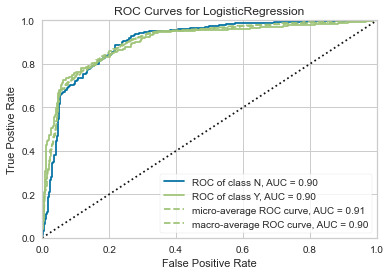

Accuracy: 0.8246575342465754
f-score: 0.8041095890410959
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.70      0.91      0.79      0.80      0.63       382
          1       0.74      0.91      0.70      0.82      0.80      0.66       348

avg / total       0.82      0.80      0.81      0.80      0.80      0.64       730



ValueError: Length of values does not match length of index

In [1056]:
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import f1_score
# from yellowbrick.classifier import ROCAUC
# from sklearn.linear_model import LogisticRegression
# from imblearn.metrics import classification_report_imbalanced
# # classes=['YY','YN','NY','NN', 'NC']
# classes=['N', 'Y']

# kf = KFold(n_splits=2)

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train = X.iloc[train_index]
#     y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
#     X_test = X.iloc[test_index]
#     y_test = y.iloc[test_index]  # See comment on ravel and  y_train
    
    
#     model = linear_model.LogisticRegression(C= 2.5,max_iter= 66,tol= 6.75e-05) 
#     model.fit(X_train, y_train)  
#     y_pred = model.predict(X_test)
#     visualizer = ROCAUC(model, classes=classes)
#     visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#     visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#     visualizer.poof() 
#     print(f'For fold {fold}:')
#     print(f'Accuracy: {model.score(X_test, y_test)}')
#     f1=f1_score(y_test, y_pred, average='micro')
#     print(f'f-score: {f1}')
#     print(classification_report_imbalanced(y_test, y_pred))
       
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
# classes=['YY','YN','NY','NN', 'NC']
classes=['N', 'Y']


X_train = train.drop('truth', 1)
y_train = train['truth']  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
X_test = test.drop('truth', 1)
y_test = test['truth']  # See comment on ravel and  y_train


model = linear_model.LogisticRegression(C= 3,max_iter= 66,tol= 6.75e-05, class_weight='balanced') 
model.fit(X_train, y_train)  

threshold = 0.32

y_proba = model.predict_proba(X_test)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_prob.max(axis=1)
predictions['y_pred']= y_pred

In [ ]:
df_out = pd.merge(predictions[['prob', 'y_pred']],test,how = 'left',left_index = True, right_index = True)
df_out.head()

In [1057]:

con1=(df_out.truth == 0) & (df_out.y_pred== 1)

test1=df_out[~(con1)]

In [1058]:
test1.shape
del test1['prob']
del test1['y_pred']

Best Threshold=0.042359,recall=1.000
Best Threshold=0.163693, F-Score=0.861


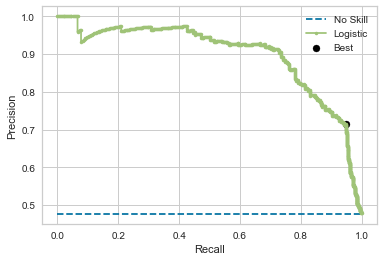

In [1059]:

#------------------Only the positive class----------
y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1.5
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)
print('Best Threshold=%f,recall=%.3f' % (thresholds[iy], recall[iy]))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [1060]:
df_out.to_csv("Predictions-LR.csv")


In [1061]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
auc_score

0.8463540096906383

In [1062]:
recall

array([1.       , 0.9137931, 0.       ])

In [1063]:
# from sklearn import metrics
# preds = model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
#     #print(thres,"******",metrics.accuracy_score(y_test, y_pred) )

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

In [1064]:

# visualizer = DiscriminationThreshold(model, fbetafloat=1)

# visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

In [1065]:
lr_auc = roc_auc_score(y_test, y_pred)
lr_auc

0.8089907925618344

In [1066]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=1.5)

0.8029787886824624

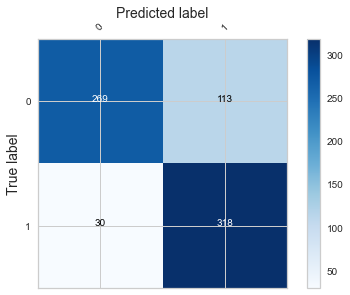

In [1067]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

---------------------------------------

## Random Forest

/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



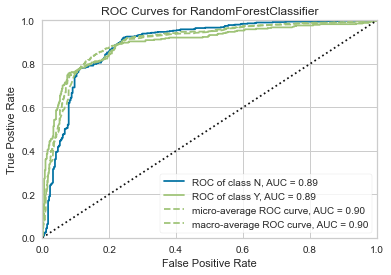

Accuracy: 0.8411764705882353
f-score: 0.8447058823529412
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.89      0.78      0.87      0.83      0.70       509
          1       0.83      0.78      0.89      0.80      0.83      0.68       341

avg / total       0.84      0.84      0.82      0.84      0.83      0.69       850



In [1019]:
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import f1_score
# from yellowbrick.classifier import ROCAUC
# from sklearn.linear_model import LogisticRegression
# from imblearn.metrics import classification_report_imbalanced
# from sklearn.ensemble import RandomForestClassifier
# classes=['YY','YN','NY','NN', 'NC']


# kf = KFold(n_splits=2)

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train = X.iloc[train_index]
#     y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
#     X_test = X.iloc[test_index]
#     y_test = y.iloc[test_index]  # See comment on ravel and  y_train



#     model = RandomForestClassifier(n_estimators=400, max_depth= 30, max_features=0.5, criterion='gini', min_samples_split=20) 
#     model.fit(X_train, y_train)  
#     y_pred = model.predict(X_test)
#     visualizer = ROCAUC(model, classes=classes)
#     visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#     visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#     visualizer.poof("RF_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
#     print(f'For fold {fold}:')
#     print(f'Accuracy: {model.score(X_test, y_test)}')
#     f1=f1_score(y_test, y_pred, average='micro')
#     print(f'f-score: {f1}')
#     print(classification_report_imbalanced(y_test, y_pred))

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['N', 'Y']


X_train = train.drop('truth', 1)
y_train = train['truth']  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
X_test = test.drop('truth', 1)
y_test = test['truth']  # See comment on ravel and  y_train


model = RandomForestClassifier(n_estimators=100, max_depth= 30, max_features=.75, criterion='entropy', min_samples_split=15, class_weight='balanced')  
model.fit(X_train, y_train)  

threshold = .52

y_proba = model.predict_proba(X_test)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_prob.max(axis=1)
predictions['y_pred']= y_pred

Best Threshold=0.000000,recall=1.000
Best Threshold=0.339008, F-Score=0.808


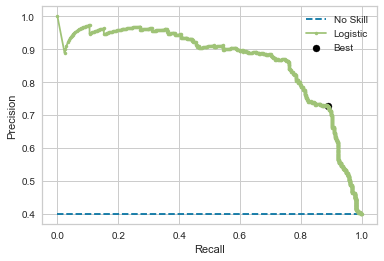

In [1020]:

#------------------Only the positive class----------
y_pred1 = y_proba[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# plot the roc curve for the model
b=1.1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
iy = argmax(recall)
print('Best Threshold=%f,recall=%.3f' % (thresholds[iy], recall[iy]))
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

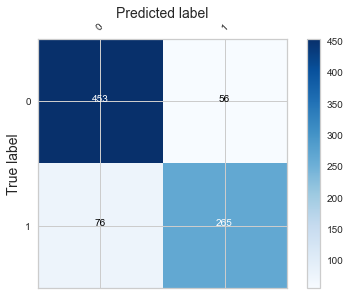

In [1021]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()



------------------

## XGBoost

[01:38:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/zahrashakeri/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



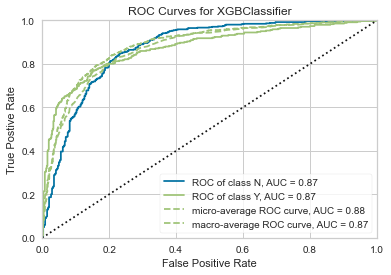

Accuracy: 0.8105882352941176
f-score: 0.7823529411764706
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.76      0.82      0.81      0.79      0.62       509
          1       0.69      0.82      0.76      0.75      0.79      0.62       341

avg / total       0.79      0.78      0.79      0.78      0.79      0.62       850



In [1001]:
# from sklearn.model_selection import KFold
# from sklearn import preprocessing
# from sklearn.metrics import f1_score
# from yellowbrick.classifier import ROCAUC
# from xgboost import XGBClassifier
# from imblearn.metrics import classification_report_imbalanced
# from sklearn.ensemble import RandomForestClassifier
# classes=['YY','YN','NY','NN', 'NC']


# kf = KFold(n_splits=2)

# for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
#     X_train = X.iloc[train_index]
#     y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
#     X_test = X.iloc[test_index]
#     y_test = y.iloc[test_index]  # See comment on ravel and  y_train

#     model = XGBClassifier(max_depth=8, gamma=0.063, colsample_bytree=0.71)
#     model.fit(X_train, y_train)  
#     y_pred = model.predict(X_test)
#     visualizer = ROCAUC(model, classes=classes)
#     visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#     visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#     visualizer.poof("XGB_Unbalanced_{}.pdf".format(fold), clear_figure=True) 
#     print(f'For fold {fold}:')
#     print(f'Accuracy: {model.score(X_test, y_test)}')
#     f1=f1_score(y_test, y_pred, average='micro')
#     print(f'f-score: {f1}')
#     print(classification_report_imbalanced(y_test, y_pred))
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
classes=['N', 'Y']


X_train = train.drop('truth', 1)
y_train = train['truth']  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
X_test = test.drop('truth', 1)
y_test = test['truth']  # See comment on ravel and  y_train


model = XGBClassifier(max_depth=8, gamma=0.03, colsample_bytree=0.71, class_weight='balanced') 
model.fit(X_train, y_train)  
threshold = 0.2

y_proba = model.predict_proba(X_test)
y_pred = (y_proba [:,1] >= threshold).astype('int')




# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test.values)
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

print(f'Accuracy: {model.score(X_test, y_test)}')
f1=f1_score(y_test, y_pred, average='micro')
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))
y_test1= y_test.to_frame()
predictions=y_test1.copy()
predictions['prob']=y_prob.max(axis=1)
predictions['y_pred']= y_pred

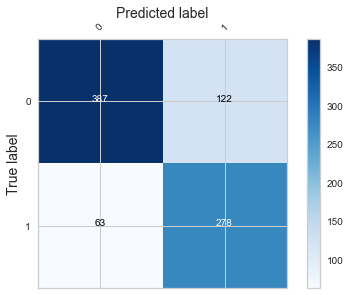

In [1002]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
matrix = confusion_matrix(y_test,y_pred)
class_names=['0','1']
# class_names = ['NN', 'NY', 'YN', 'YY']
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [456]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

Best Threshold=0.390996, F-Score=0.807


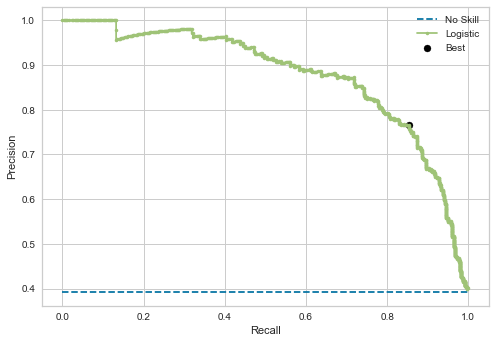

In [560]:
model = RandomForestClassifier(n_estimators=100, max_depth= 30, max_features=.75, criterion='entropy', min_samples_split=15, class_weight='balanced')  
clf=model.fit(X_train, y_train)  
y_pred = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# plot the roc curve for the model
b=1
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


In [445]:
from numpy import argmax
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.474505, F-Score=0.787


In [538]:
print(y_test)

1       0
13      0
14      0
20      0
22      0
       ..
3435    0
3445    1
3448    0
3451    1
3454    0
Name: truth, Length: 850, dtype: category
Categories (2, int64): [0, 1]


In [542]:
type(y_pred)

numpy.ndarray

-------------------------------------------

## Other Truth Inference Techniques

In [724]:
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import ROCAUC
from imblearn.metrics import classification_report_imbalanced

df= pd.read_csv("Inference Methods/PA-MV-test.csv", sep=',')
df = df.drop_duplicates(subset=['question'])
df.shape

(850, 4)

In [725]:
df.head()

,question,result,truth,dif
0,5cf83c1d44578a0664ea03ba,0,0,0
1,5cf83d3e44578a066414a4bc,0,0,0
2,5cf83fdf44578a06646846b3,1,1,0
3,5cf845e544578a0664750f34,1,1,0
4,5cf8476344578a0664a2ac0e,1,1,0


In [726]:
y_test= df['truth']
y_pred= df['result']

f1=f1_score(y_test, y_pred, average='micro')

In [727]:
print(f'f-score: {f1}')
print(classification_report_imbalanced(y_test, y_pred))

f-score: 0.8494117647058823
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.93      0.72      0.88      0.82      0.69       517
          1       0.88      0.72      0.93      0.79      0.82      0.66       333

avg / total       0.85      0.85      0.80      0.85      0.82      0.67       850



In [728]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion

result,0,1
truth,,
0,483,34
1,94,239


In [729]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)

In [730]:
auc_score

0.8518819142348555

In [731]:
precision

array([0.39176471, 0.87545788, 1.        ])

In [732]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
b=2
fscore = (1+b*b) * ((precision * recall) / (((b*b)*precision) + recall))

In [734]:
fscore

array([0.76306141, 0.74454829, 0.        ])

In [274]:
f1 = f1_score(y_test, y_pred)

In [275]:
f1

0.7887788778877889

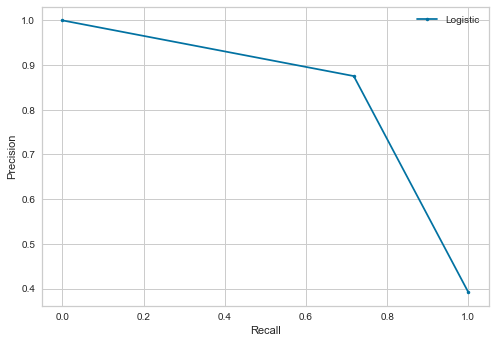

In [276]:
from matplotlib import pyplot
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [277]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [278]:

lr_auc = roc_auc_score(y_test, y_pred)
lr_auc

0.8259768472534429

In [279]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

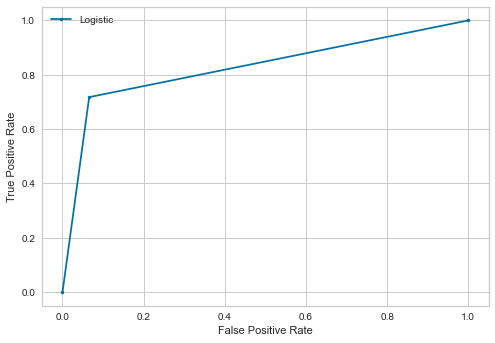

In [280]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()